<a href="https://colab.research.google.com/github/aniilkeles/DeepLearningNotes/blob/main/ArtificialNeuralNetwork/PyTorch_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# with mnist dataset clarify number classification project

In [2]:
import torch # PyTorch Library
import torch.nn as nn # Artificial Neural Network
import torch.optim as optim # Optimization Algorithms
import torchvision # Image Processing and pre-defined or trained models
import torchvision.transforms as transforms # Image transforming
import matplotlib.pyplot as plt

In [3]:
# 60 bin tane veriyi farklı katmanlarla farklı ağırlıklarla farklı aktivasyon fonksiyonlarıyla matematiksel işlemlere sokmak demek bunların her biri bizim bilgisayarımızda depolanmak zorunda.Bunlar bizim bilgisayarımıza
# kaydedilirki matematiksel işlemler gerçekleşebilsin.Matematiksel işlemler için memory'e ihtiyaç vardır.Biz küçük paketlere bölerek küçük paketler halinde iterasyonlar halinde gerçekleştiririz.Bu şekilde
# bilgisayarın memory'si şişmemiş olur.Bu nedenle batch size belirlenir.Memory doluysa batchsize küçültebiliriz hızlı çalışıyorsada büyütebiliriz.batch size küçükse yavaş çalışır batchsize büyük olursada memory hatası alınabilir.
# batchsize = 64 demek 60 bin tane veri var diyelim 60.000 / 64 = 938 60 bin veri 938 kerede train edilir.Yani toplamda forward ve back propagation sayısı 938 olur.Bu bir epoch içindir.
# ilk işlem olarak transforms kullanılır bu sayede görüntü tensorlere çevrilir dönüştürülür sonra da pixel değerlerini -1 ve 1 arasına scale edeceğiz.Ölçeklendirme işlemi yapılır yani sonrasında.
def get_data_loaders(batch_size=64): #batch_size = verimizi kaçlı paketler halinde tanımladığımızı ifade eder.Her iterasyonda işlenecek veri miktarı.
      transform = transforms.Compose([
          transforms.ToTensor(), # burası python image library ile elde edilen bir görüntü olabilir ya da klasik bir numpy array olabilir bunu alıp pytorch ta işlememize olanak tanır.Bir matris formatı ya da array.
          transforms.Normalize((0.5,), (0.5,)) # mean ve standard sapmaya göre scaling işlemi.Piksel değerlerini -1 ve 1 arasına ölçeklendirir.
      ])
      #mnist veri seti ve eğitim test kümeleri oluşturam
      train_set = torchvision.datasets.MNIST(root='./data',train=True,download=True,transform=transform) # root görüntüleri nereye indireceğimizdir.
      test_set = torchvision.datasets.MNIST(root='./data',train=False,download=True,transform=transform)

      train_loader = torch.utils.data.DataLoader(train_set,batch_size=batch_size,shuffle=True)
      test_loader = torch.utils.data.DataLoader(test_set,batch_size=batch_size,shuffle=False)

      return train_loader,test_loader

In [4]:
train_loader,test_loader = get_data_loaders()

100%|██████████| 9.91M/9.91M [00:00<00:00, 44.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.20MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 10.9MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.71MB/s]


In [11]:
def visualize_samples(loader,n):
  images,labels = next(iter(loader)) # ilk batchden görüntü ve etiketler alınır.
  print(images[0].shape)
  fig ,axes = plt.subplots(1,n,figsize=(10,5)) # n farklı görüntü için görselleştirme yaptım.
  for i in range(n):
    axes[i].imshow(images[i].squeeze(),cmap="gray") # görseli gri tonlamalı gösterir.
    axes[i].set_title(f"Label : {labels[i].item()}") # görüntüye ait sınıf etiketini başlık olarak yazar.
    axes[i].axis("off") # eksenleri gizler

  plt.show()

torch.Size([1, 28, 28])


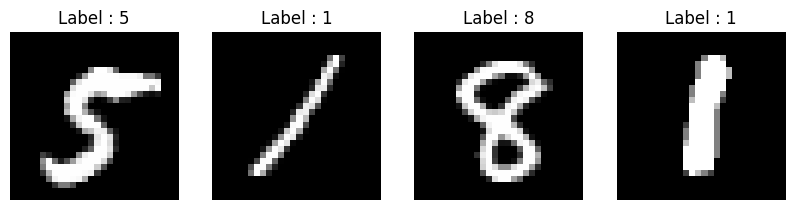

In [12]:
visualize_samples(train_loader,4)

In [16]:
# yapay sinir ağı class
# neural network inşası için gerekli bileşenleri tanımlamış olduk
class NeuralNetwork(nn.Module): # pytorchun nn.module sınıfından miras alıyor.Bir tane constructor yani initilazer tanımlıyoruz birde forward propagation tanımlayacağız.
      def __init__(self):
        super(NeuralNetwork,self).__init__() # bu şekilde inheritance işlemiyle pytorchun içinde bulunan neural network modülünün içerisindeki layerlara ya da ihtiyacımız olan herhangi bir şeye ulaşabiliriz.
        self.flatten = nn.Flatten() # 28*28 =784lük vektör                                   # artificial neural networkları inşa edebilmek için elimizde bulunan 2 boyutlu görüntüleri tek boyutlu hale çevirmemiz gerekecek.Vektör haline çevireceğiz.
        self.fc1 = nn.Linear(28*28, 128) #28*28=784 input size , 128 = output size  #ilk tam bağlı katmanı oluşturuyoruz.Sonrasında aktivasyon fonksiyonuyla beslememiz gerekiyor.Sonrasında ikinci tam bağlı katmanı oluşturacağız.
        self.relu = nn.ReLU()                                   # Sonrasında da çıktı katmanı oluşturabiliriz.
        self.fc2 = nn.Linear(128 , 64) # 128 = input size , 64 = output size
        self.fc3 = nn.Linear(64,10)   #output da yazabilirdik biz fc3 tercih ettik genelde böyle tercih edilir 64=> input size output size=>10 olmak zorunda 10 sınıflı bir sınıflandırma problemi çözüyoruz (0-9 etiketleri)

      def forward(self,x): # forward propagation , giriş olarak x alsın x=görüntü
        x = self.flatten(x) #initial x = 28*28 bir görüntü => düzleştir yani 784 lük bir vektör haline getireceğiz.
        x = self.fc1(x) # birinci bağlı katman
        x = self.relu(x) # aktivasyon fonksiyonu
        x = self.fc2(x) # ikinci bağlı katman
        x = self.relu(x) # aktivasyon fonksiyonu
        x = self.fc3(x) # output katmanı

        # en sonunda x diye bir output üretecek
        return x # modelimizin outputu

In [21]:
# model oluşumu
model = NeuralNetwork() # NeuralNetwork().to(device) GPU kullandığımızda lazım olur.
# kayıp fonksiyonu ve optimizasyon algoritmasını belirle.
define_loss_and_optimizer = lambda model:(nn.CrossEntropyLoss(),optim.Adam(model.parameters(),lr=0.001)) # cross entropy loss fonksiyonu multi class classification problems loss function
# optimizer => update weights with adam
criterion , optimizer = define_loss_and_optimizer(model)

In [26]:
# train
def train_model(model,train_loader,criterion,optimizer,epochs=10):# loss fonksiyon kriteri olacak neural network bir tahmin yapacak gerçektede bir etiket değeri vardır y_pred ve y_test bunların bir değerlendirmesi yapılacak bunuda bir kriter aracılığıyla yani cross entropy loss fonksiyonumuzla yapacak.
      # modeli eğitim moduna alacağım.
      model.train()
      # her bir epoch sonucunda elde edilen loss değerlerini saklamak için bir liste tanımlayacağım.
      train_losses = []
      # belirtilen epoch sayısı kadar eğitim yapacağım.
      for epoch in range(epochs):
        total_loss = 0 # toplam loss değeri
        # tüm eğitim verileri üzerinde iterasyon gerçekleştireceğim.
        for images,labels in train_loader:
          # images,labels = images.to(device) , labels.to(device) # verileri cihaza taşıma işlemi CPU da bir önemi yok
          # neural networkun trainingi için gradyanları sıfırlamamız gerekecek.
          optimizer.zero_grad()
          # modeli uygulama aşaması forward propagation
          predictions = model(images)
          # loss hesaplama => y_pred ile y_test burada neural network de her bir iterasyonda her bir epochta kayıp değeri azalması gerekecek.Kayıp azalırsa neural network öğrenir.Bu kayıp değerlerini depolayacam bu sayede öğrenip öğrenmeme sürecini gözlemleyeceğim.
          loss = criterion(predictions , labels)
          # loss ne kadar düşük çıkarsa okadar iyi olacaktır fazla çıkarsa bir backward propagation hesaplamamız gerekecektir.Yani gradyan hesaplama işi
          loss.backward()
          # update weights
          optimizer.step()

          total_loss = total_loss + loss.item() # loss.item() loss bize bir liste return edecek bizde o sayıyı item olarak alabiliriz.

        avg_loss = total_loss/len(train_loader) # ortalama kayıp hesaplar
        train_losses.append(avg_loss)
        print(f"Epoch : {epoch+1}/{epochs}, Loss : {avg_loss:.3f}")

      # loss graph
      plt.figure()
      plt.plot(range(1,epochs+1),train_losses,marker="o",linestyle="-",label = "Train Loss")
      plt.xlabel("Epochs")
      plt.ylabel("Loss")
      plt.title("Training Loss")
      plt.legend()
      plt.show()

Epoch 1/5, Loss : 0.193
Epoch 2/5, Loss : 0.140
Epoch 3/5, Loss : 0.114
Epoch 4/5, Loss : 0.096
Epoch 5/5, Loss : 0.083


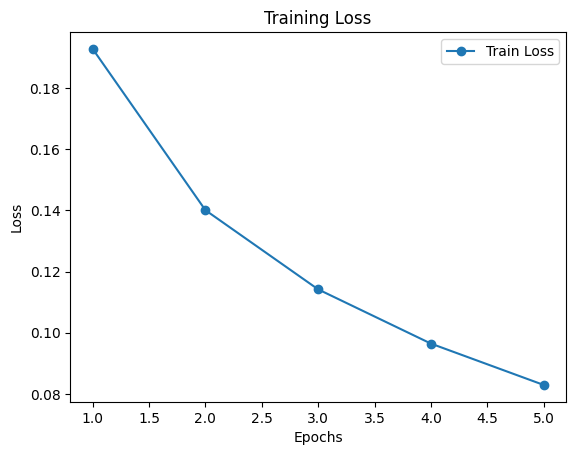

In [28]:
train_model(model,train_loader,criterion,optimizer,epochs=5)

In [32]:
# test model
def test_model(model,test_loader):
  model.eval() # modeli değerlendirme moduna alıyorum.
  correct = 0 # modelimizin yapmış olduğu doğru tahminleri tutacak
  total = 0 # toplam veri sayısını tutacak.

  with torch.no_grad() : # gradyan hesaplamasını zaten trainde yaptığımız için testte kapatıyorum.
    for images,labels in test_loader: # test veri kümesini döngüye alıyorum
      predictions = model(images)
      _, predicted = torch.max(predictions,1) # torch.max iki tane parametre return eder , ilkinin ne olduğuyla ilgilenmediğim için _ yaptım ikinciside benim için predicted value indeksi
                                              # görüntülerimizden 0,1,2,3,..,9 tane değer var birinin olma olasılığı diyelimki 0 diğerinin 0.1 [0,0.1,0.2...] diyelimki bunlardan en büyüğü 0.2 burdaki _ 0.2 denktir indekside predicted'a. 2.indekste etikete denk gelir
      total += labels.size(0) # toplam veri sayısını günceller
      correct += (predicted==labels).sum().item() # doğru tahminleri sayarım.

  print(f"Test Accuracy : {100*correct/total:.3f}%")


test_model(model,test_loader)


Test Accuracy : 96.250%


torch.Size([1, 28, 28])


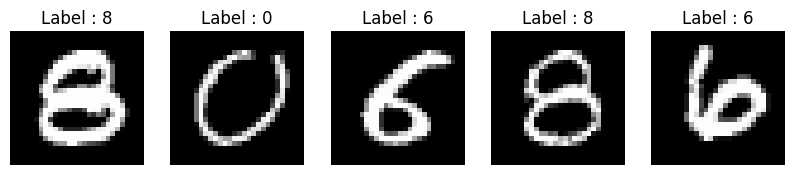

Epoch 1/10, Loss : 0.397
Epoch 2/10, Loss : 0.187
Epoch 3/10, Loss : 0.137
Epoch 4/10, Loss : 0.112
Epoch 5/10, Loss : 0.096
Epoch 6/10, Loss : 0.085
Epoch 7/10, Loss : 0.078
Epoch 8/10, Loss : 0.070
Epoch 9/10, Loss : 0.060
Epoch 10/10, Loss : 0.055


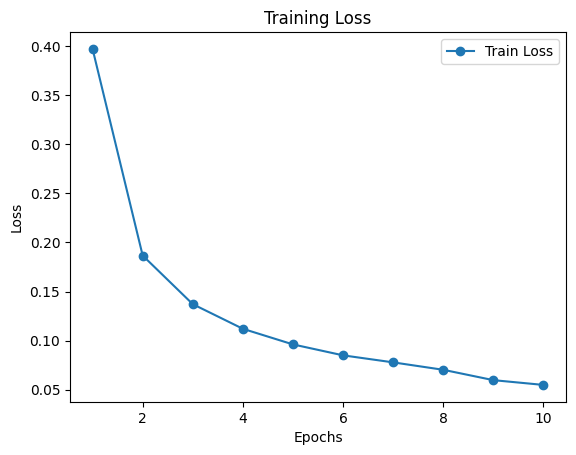

Test Accuracy : 97.490%


In [33]:
if __name__ == "__main__":
  train_loader,test_loader = get_data_loaders() # veri yükleyicilerini alma işlemi
  visualize_samples(train_loader,5)
  model = NeuralNetwork()
  criterion,optimizer = define_loss_and_optimizer(model)
  train_model(model,train_loader,criterion,optimizer)
  test_model(model,test_loader)